# IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from wordcloud import WordCloud

**importing "jobs_company_profiles.csv" file**

In [ ]:
df_original = pd.read_csv('jobs_company_profiles.csv')

In [ ]:
df_original.head()

,JobID,Job Title,Salary Estimate,NumberofReviews,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,CompanyType,Industry,Sector,Revenue,Competitors,Easy Apply,No.OFApplicants
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),86,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Type 4,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,TRUE,728
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),192,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Type 5,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1,378
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),84,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Type 6,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1,354
3,3,Data Analyst,$37K-$66K (Glassdoor est.),116,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,Type 2,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,108
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),196,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Type 4,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,TRUE,524


# Basic Analysis of data

In [ ]:
df_original.shape


(2256, 18)

**There are 2256 rows and 18 columns in the data**

In [ ]:
print(f'Column names: {df_original.columns.tolist()}')

Column names: ['JobID', 'Job Title', 'Salary Estimate', 'NumberofReviews', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'CompanyType', 'Industry', 'Sector', 'Revenue', 'Competitors', 'Easy Apply', 'No.OFApplicants']


In [ ]:
df_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   JobID              2256 non-null   int64  
 1   Job Title          2256 non-null   object 
 2   Salary Estimate    2256 non-null   object 
 3   NumberofReviews    2256 non-null   int64  
 4   Rating             2256 non-null   float64
 5   Company Name       2255 non-null   object 
 6   Location           2256 non-null   object 
 7   Headquarters       2256 non-null   object 
 8   Size               2256 non-null   object 
 9   Founded            2256 non-null   object 
 10  Type of ownership  2256 non-null   object 
 11  CompanyType        2256 non-null   object 
 12  Industry           2256 non-null   object 
 13  Sector             2256 non-null   object 
 14  Revenue            2256 non-null   object 
 15  Competitors        2256 non-null   object 
 16  Easy Apply         2256 

There is no null data currently. Lets analyse the data if its correct or not.

In [ ]:
df_original.describe()

,JobID,NumberofReviews,Rating,No.OFApplicants
count,2256.000000,2256.000000,2256.000000,2256.000000
mean,1125.812057,124.040337,3.162012,509.052748
std,650.883439,43.788624,1.664849,285.874640
min,0.000000,50.000000,-1.000000,2.000000
25%,561.750000,86.000000,3.100000,258.000000
50%,1125.500000,124.000000,3.600000,509.000000
75%,1689.250000,162.000000,4.000000,769.000000
max,2252.000000,200.000000,5.000000,999.000000


we can see that mean and median are almost equal. Lets analyse the data if its correct or not.

#  Prepare a list of quality issues in data:

# 1. Null Value Representation as -1

- Instead of null, -1 is present in the data.

- For categorical data (like Headquarters, Industry, Easy Apply), -1 does not make any sense.

- Even for numerical data (like "Rating" column), filling -1 where the value is not known can affect the analysis

# **Resolving this issue:**

- Replacing -1 with NAN values

In [ ]:
df_original.replace('-1', np.nan, inplace=True)
df_original.replace(-1, np.nan, inplace=True)

In [ ]:
df_original.describe()

,JobID,NumberofReviews,Rating,No.OFApplicants
count,2256.000000,2256.000000,1984.000000,2256.000000
mean,1125.812057,124.040337,3.732611,509.052748
std,650.883439,43.788624,0.670914,285.874640
min,0.000000,50.000000,1.000000,2.000000
25%,561.750000,86.000000,3.300000,258.000000
50%,1125.500000,124.000000,3.700000,509.000000
75%,1689.250000,162.000000,4.100000,769.000000
max,2252.000000,200.000000,5.000000,999.000000


Although we replaced -1 with nan, we can see slight difference in mean values, still our data is in unstructured format, so we need to fix that before further analysis.

# **2. Unstructured data**
- The quality issue in the columns like "Salary Estimate", "Size" and "revenue" are that the data is not in a structured format. - The data appears to be a range of salary estimates presented as strings, and it includes additional text and unnecessary  characters.
  - Unnecessary Text "(Glassdoor est.)" in salary estimation adds noise to the data.
  - Unnecessary Text "Employees" in Size column
  - Data is in various formats in "Revenue" column like: text, numerical   
    -ranges,  additional text such as "(USD)" and "Unknown / Non-Applicable."
    -values such as "$100 to $500 million (USD)" or "$10+ billion (USD)." are not consistent and hence hard to work with.
  
# Resolving the issue:
- size column
    - extracting the numbers present in the column
    - if size is like "200 to 500 employees", replacing it with mean of upper and lower value
    - if size is like "1000+ Employees", replace it with 1000
    - else replace with NAN
    
- Salary Estimate column:
    - values "37𝐾−66K (Glassdoor est.)" are not numeric
    - remove "(Glassdoor est.)"
    - find mean of upper and lower values
    - replace nan with column mean value
    
- Revenue Column:
     - values like "(USD)", "$" values are adding noise to the data
     - remove all the strings
     - for values like 1 to 50 million, find mean of 1 million to 50 million and replace the value
     - for values like 10+ million, replace with 10 miilion
     - then to fill nan values, replace it with column mean value
     
     

In [ ]:
df = df_original.copy()

In [ ]:
# Pre-processing "Size" column
import re

def extract_num_employees(text):
    """
    get the numbers from string value,i.e, excluding 'to' and 'employees' strings
    then find mean of the numbers
    """
    try:
        numbers = re.findall(r'\d+', text)

        return int(sum(map(int, numbers)) / len(numbers))
    except:
        return pd.NA

df['Size'] = df['Size'].apply(extract_num_employees)

In [ ]:
# Pre-processing "Salary Estimate" column
def convert_salary(sal):
    if pd.notna(sal):
        sal = sal.replace('(Glassdoor est.)','').replace('K','000').replace('$','') #replace all unwanted values
        if('-' in sal):
            x = sal.split('-')
            lower=int(x[0])
            upper=int(x[1])
            sal = int((lower+upper)/2)  # find mean of the values

        return sal

df['Salary Estimate'] = df['Salary Estimate'].apply(convert_salary)

In [ ]:
# Pre-processing "Revenue" column
def convert_revenue_to_numeric(revenue_str):
    if pd.notna(revenue_str):
        revenue_str = revenue_str.replace('$', '').replace(' (USD)', '')  #remove unwanted values
        revenue_str = revenue_str.replace('+','').replace('Less than', '').replace('Unknown / Non-Applicable','0')
        if(('million' in revenue_str) & ( 'billion' in revenue_str)):
            if(revenue_str.endswith('billion')):
                 revenue_str = revenue_str.replace(' billion', '000 million')  #converting billion to million
        if revenue_str.endswith('million'):
            revenue_str = revenue_str.replace('to','million to')
        if revenue_str.endswith('billion'):
            revenue_str = revenue_str.replace('to','billion to')
        if 'million million' in revenue_str:
            revenue_str = revenue_str.replace('million million','million')
        revenue_str = revenue_str.replace(' million', '0'*6).replace(' billion', '0'*9)   #convert million and billion to 0s
        if('to' in revenue_str):
            x = revenue_str.split(' to ')
            lower = int(x[0])
            upper = int(x[1])
            mean = (lower+upper)/2  #find mean value
            return mean
        else:
            return int(revenue_str)
    else:
        return np.nan

df['Revenue'] = df['Revenue'].apply(convert_revenue_to_numeric)
df['Revenue'].replace(0, np.nan, inplace=True)

# 3. Wrong values   
    
- Some values are wrong in columns, Like in 'Founded' column, we can see 'Company - private' value.
- In "Type of Ownership" column, values like '1784', '2011', '1984' are present

# Resolving the issue:
- "Founded" column: Converting the column values to numeric and if string occurs, replace with nan
- "Type of Ownership" column - if numeric value is present, replace it with nan
- later we will handle the null values with fillna()  function

In [ ]:
# Find rows with numeric values in the specified column
mask_numeric = df['Type of ownership'].str.contains(r'\d+', na=False)

# Replace rows with numeric values with nan
df.loc[mask_numeric, "Type of ownership"] = np.nan
df['Founded'] = pd.to_numeric(df['Founded'], errors='coerce')

#  Removing null data

In [ ]:
df['Founded'].fillna(df['Founded'].mean(), inplace=True)           #fill null values with mean value
df['Type of ownership'].fillna('unknown', inplace=True)            #fill null values with 'Unknown'
df['Size'].fillna(df.Size.mode().values[0], inplace=True)          #fill null values with mode value
df.dropna(subset=['Salary Estimate','Company Name'], inplace=True) #dropping null columns as only 1-2 rows have null values.
df['Revenue'].fillna(df['Revenue'].mean(), inplace=True)           #fill null values with mean value
df['Rating'].fillna(df.Rating.mean(), inplace=True)                #fill null values with mean value

#for "Industry" and  "Sector" column, if we replace by mode, it might affect our analysis as these columns have high
#dependency on other columns like "Type of ownership", "Company type".
# We can apply NLP methods to find out the text present in corresponding "Type of ownership" and "Company type" columns,
# and try to fing the closest value, but as we have time constraint, I am filling null values with 'unknown'.

df['Industry'].fillna('unknown', inplace=True)          #fill null values with 'Unknown'
df['Sector'].fillna('unknown', inplace=True)            #fill null values with 'Unknown'

# Assuming 'Easy Apply' column indicates that User can directly apply to the company with one click.
# Ideally, it should have True or False.
# But, we had True and -1 as values. So, I am assuming -1 here means False.Now after replacing
# -1 with nan. I am filling nan with 'False' for 'Easy Apply' column

df['Easy Apply'].fillna(False,inplace=True)


In [ ]:
# for filling null values of "Headquarters" column: Check the corresponding value in "location" column.
# For that location, find the mode of value in "Headquarters" column. and replace null with that mode value.

def fill_na_with_mode(df, val, A, B):
    """
    replace NaN values in a column with
    @param df: dataframe
    @param val: value of the corresponding column for current row
    @param A: column where null value is present
    @param B: column used to fill the null values
    """
    x = df[df[B]==val][A].value_counts()
    if(len(x))>0:
        x = x.index[0]
        return x
    return 'Unknown'
df['Headquarters'] = df.apply(lambda x : x['Headquarters'] if not pd.isna(x['Headquarters']) else fill_na_with_mode(df, x['Location'], 'Headquarters', 'Location'), axis = 1)

# for filling null values of "Competitors" column: Check the corresponding value in "Industry" column.
# For that Industry, find the mode of value in "Competitors" column. and replace null with that mode value.

df['Competitors'] = df.apply(lambda x : x['Competitors'] if not pd.isna(x['Competitors']) else fill_na_with_mode(df, x['Industry'], 'Competitors', 'Industry'), axis = 1)

**Removing Duplicate Rows from data**

In [ ]:
df[df['JobID']==312]

,JobID,Job Title,Salary Estimate,NumberofReviews,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,CompanyType,Industry,Sector,Revenue,Competitors,Easy Apply,No.OFApplicants
312,312,Data Science Lead Analyst,39500.0,109,4.6,VIVA USA INC\n4.6,"Franklin Lakes, NJ","Rolling Meadows, IL",125,1996.0,Company - Private,Type 1,IT Services,Information Technology,37500000.0,"Kforce, Insight Global, Volt Consulting Group",False,165
313,312,Data Science Lead Analyst,39500.0,162,4.6,VIVA USA INC\n4.6,"Franklin Lakes, NJ","Rolling Meadows, IL",125,1996.0,Company - Private,Type 6,IT Services,Information Technology,37500000.0,"Kforce, Insight Global, Volt Consulting Group",False,165


## Data Quality Issue:

    -For few job Ids, there are duplicate Job Ids with few mismatched data, Which is impossible,

    -So dropping the duplicate rows to get unique Job Ids.

In [ ]:
df.drop_duplicates(['JobID'], inplace=True)

In [ ]:
df.isnull().sum()

JobID                0
Job Title            0
Salary Estimate      0
NumberofReviews      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
CompanyType          0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
No.OFApplicants      0
dtype: int64

**Now, the data is preprocesed and there are no null values in our data.**

In [ ]:
df.describe()

,JobID,Salary Estimate,NumberofReviews,Rating,Size,Founded,Revenue,No.OFApplicants
count,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2.251000e+03,2251.000000
mean,1125.219458,72121.279431,123.998223,3.731651,2600.433141,1978.456186,2.060260e+09,509.378498
std,650.276470,23605.836291,43.788228,0.628670,3713.373815,40.008048,2.798890e+09,285.955329
min,0.000000,33500.000000,50.000000,1.000000,25.000000,1682.000000,1.000000e+06,2.000000
25%,562.500000,58000.000000,86.000000,3.400000,125.000000,1978.483972,7.500000e+07,258.500000
50%,1125.000000,69000.000000,124.000000,3.732274,350.000000,1978.483972,2.057539e+09,509.000000
75%,1687.500000,80500.000000,162.000000,4.000000,3000.000000,2002.000000,2.057539e+09,769.000000
max,2252.000000,150000.000000,200.000000,5.000000,10000.000000,2019.000000,1.000000e+10,999.000000


**for "Size" column, mean and median values are not same. we will check this again after outlier removal**

# 2. Indicate which column(s) can act as primary key

- Primary key: JobID
  - 'JobID' column can be considered the primary key for this dataset, ensuring that each job record is uniquely identified by its corresponding JobID

In [ ]:
df.nunique() #find unique values in all columns

JobID                2251
Job Title            1271
Salary Estimate        73
NumberofReviews       151
Rating                 37
Company Name         1513
Location              253
Headquarters          483
Size                    7
Founded               161
Type of ownership      15
CompanyType             9
Industry               89
Sector                 25
Revenue                13
Competitors           291
Easy Apply              2
No.OFApplicants       885
dtype: int64

In [ ]:
df.shape

(2251, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2251 entries, 0 to 2255
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   JobID              2251 non-null   int64  
 1   Job Title          2251 non-null   object 
 2   Salary Estimate    2251 non-null   float64
 3   NumberofReviews    2251 non-null   int64  
 4   Rating             2251 non-null   float64
 5   Company Name       2251 non-null   object 
 6   Location           2251 non-null   object 
 7   Headquarters       2251 non-null   object 
 8   Size               2251 non-null   int64  
 9   Founded            2251 non-null   float64
 10  Type of ownership  2251 non-null   object 
 11  CompanyType        2251 non-null   object 
 12  Industry           2251 non-null   object 
 13  Sector             2251 non-null   object 
 14  Revenue            2251 non-null   float64
 15  Competitors        2251 non-null   object 
 16  Easy Apply         2251 

#  Find out the outliers in the dataset and give reasons how to handle these outliers.

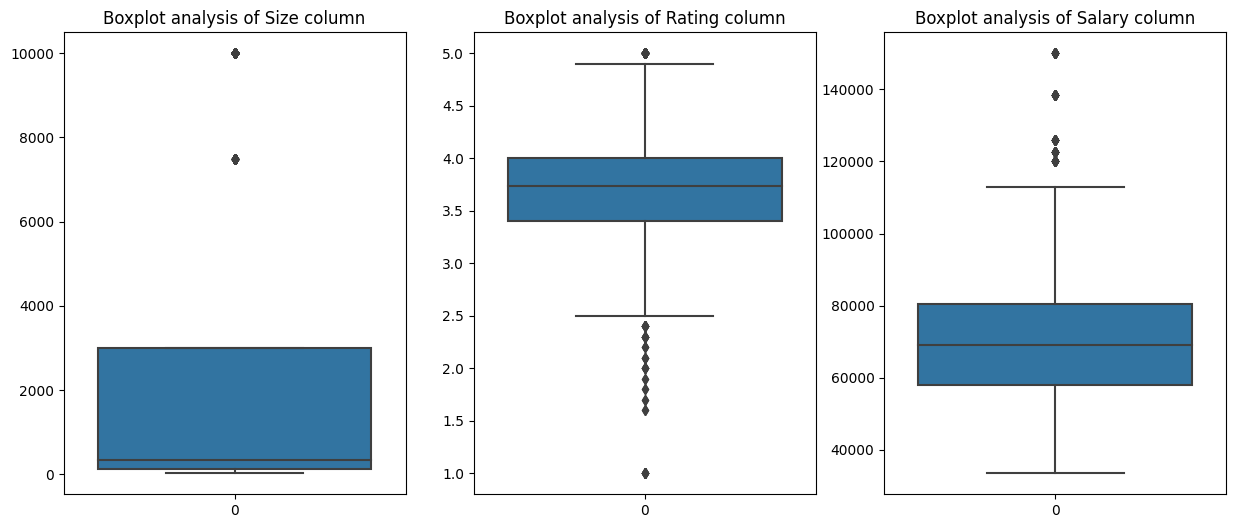

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(df['Size'])
plt.title('Boxplot analysis of Size column')
plt.subplot(1,3,2)
sns.boxplot(df['Rating'])
plt.title('Boxplot analysis of Rating column')
plt.subplot(1,3,3)
sns.boxplot(df['Salary Estimate'])
plt.title('Boxplot analysis of Salary column')
plt.show()

**We have a combination of Numerical and categorical data. I am finding outliers individually in both of them.**

**Numerical Data: 'JobId' is not considered as it does not contribute to data analysis part. It is unique for all columns**

**Applying IQR method:
The IQR method, is a method for identifying outliers in a dataset. It is based on the interquartile range, which is the difference between the 75th and 25th percentiles of the dataset. Data points that are outside of the range of 1.5IQR to 3IQR are considered outliers**

**Categorical Data: 'Job Title','Company Name' are not conidered as both columns will have range of different values for each Job Id.**

**Applying value_counts():
If value_count() is less than 2, removing those data rows**

**After finding all the numerical and categorical rows to remove, I am taking intersection of those values to find the common rows to delete**

In [ ]:
def Get_Numerical_Outlier_indices(df, cols):
    out_ind = []
    for col in cols:
        q1 = df[col].quantile(0.25)
        q2 = df[col].quantile(0.75)
        iqr = q2-q1
        rare_ind = df[((df[col]<(q1-(1.5*iqr)))|(df[col]>(q2+(1.5*iqr))))].index
        out_ind.extend(rare_ind)

    out_ind = set(out_ind)
    return out_ind

numerical_columns = ['NumberofReviews', 'Rating','Salary Estimate', 'Size', 'Founded', 'Revenue', 'No.OFApplicants']
numerical_outlier_indices = Get_Numerical_Outlier_indices(df, numerical_columns)

In [ ]:
elements_to_remove = numerical_columns + ['JobID', 'Job Title','Company Name' ]
cat_col = list(filter(lambda x: x not in elements_to_remove, df.columns.tolist()))

def Get_Categorical_Outlier_indices(df, cols):
    out_ind = []
    for col in cat_col:
    #     print(col)
    #     print(df[col].value_counts())
        value_counts = df[col].value_counts()

        rare_categories = value_counts[value_counts < 2].index.tolist()
        rare_indices = df[df[col].isin(rare_categories)].index.tolist()
        out_ind.extend(rare_indices)

    out_ind = set(out_ind)
    return out_ind

categorical_outlier_indices = Get_Categorical_Outlier_indices(df,cat_col)

In [ ]:
indices_to_remove = categorical_outlier_indices.intersection(numerical_outlier_indices)

In [ ]:
len(indices_to_remove) #number of rows considered as outliers

155

In [ ]:
df = df.drop(indices_to_remove) #dropping outlier rows

In [ ]:
df.shape

(2096, 18)

# Provide probability distribution which suits the best for this particular datasets with reasons.

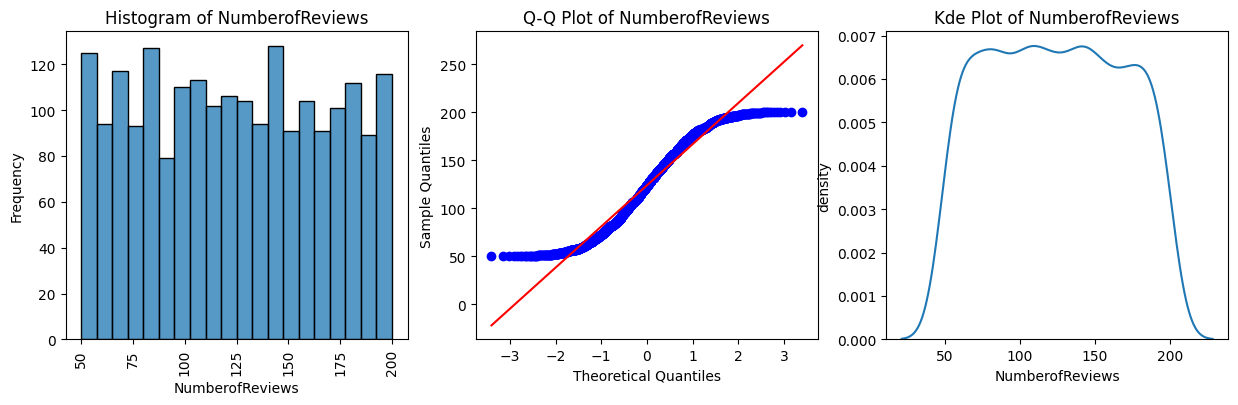

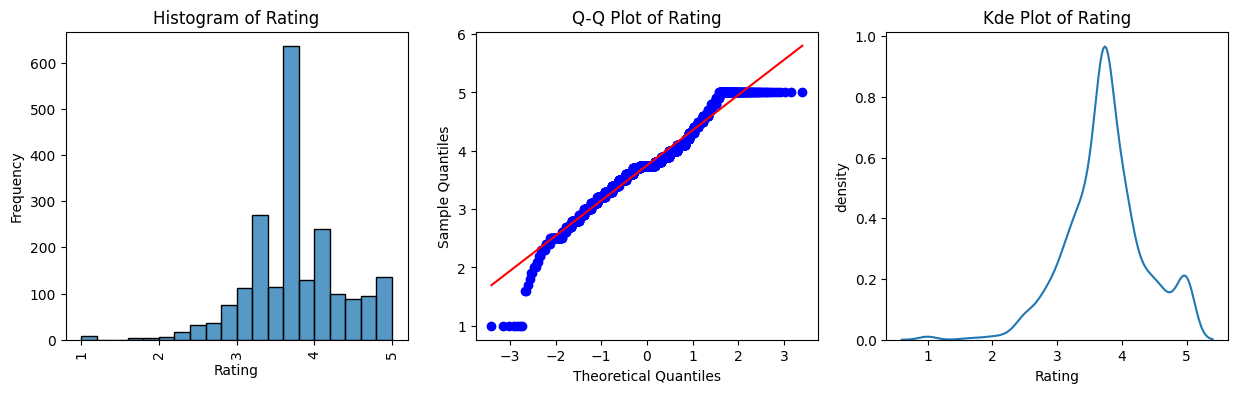

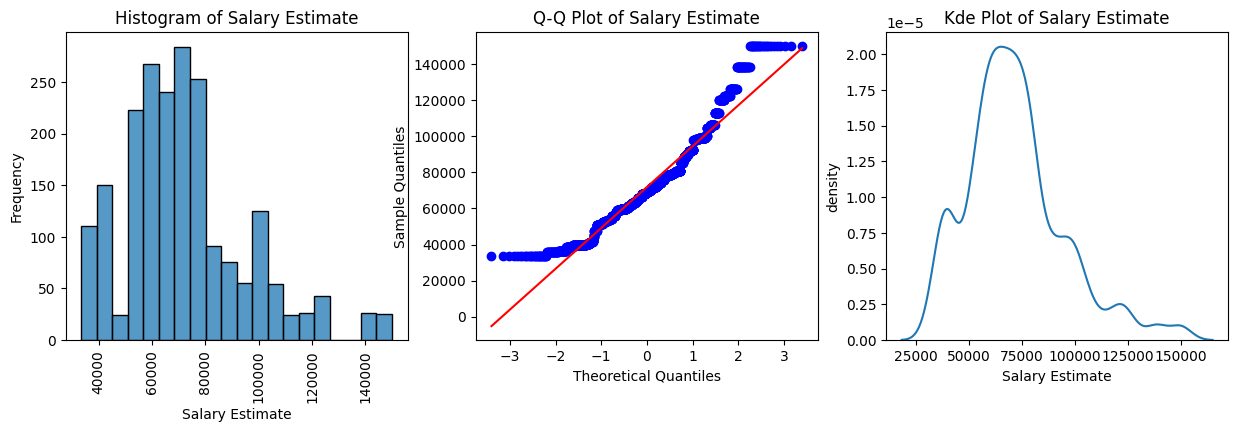

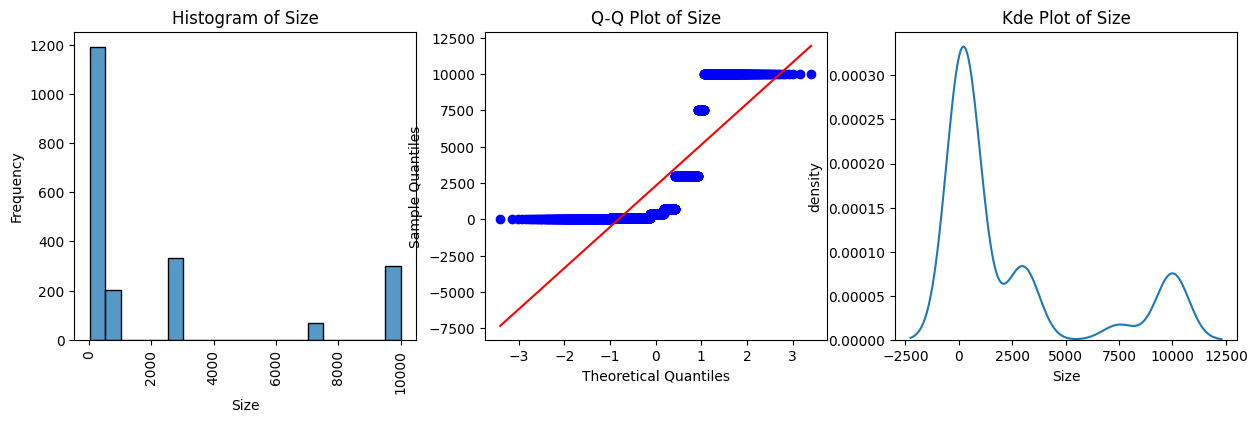

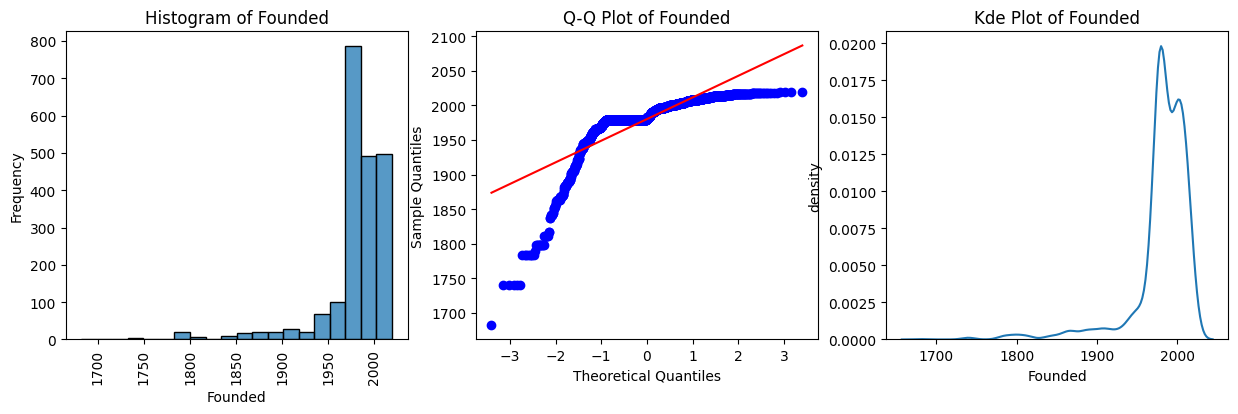

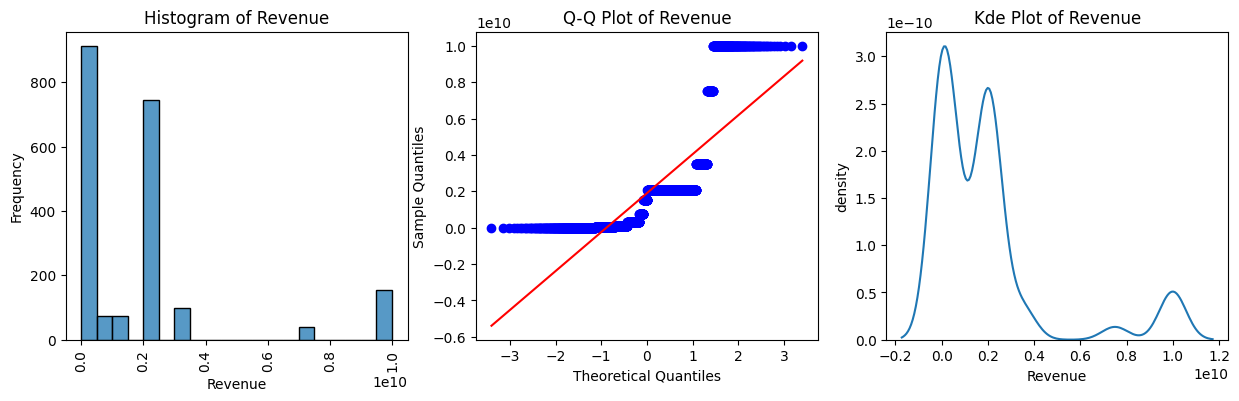

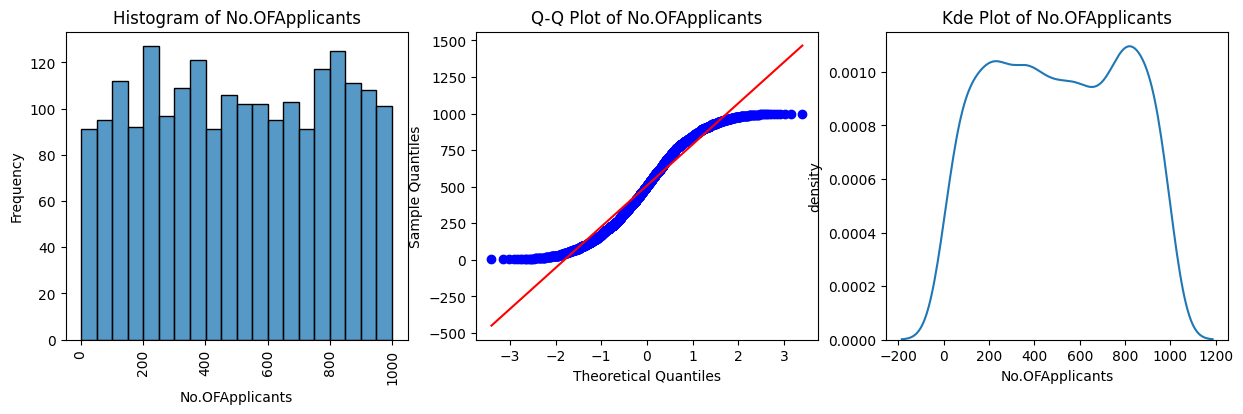

In [ ]:
numerical_columns = ['NumberofReviews', 'Rating','Salary Estimate', 'Size', 'Founded', 'Revenue', 'No.OFApplicants']

# Plot histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(15, 4))
    plt.subplot(1,3,1)
    sns.histplot(df[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    stats.probplot(df[column], dist='norm', plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(f'Q-Q Plot of {column}')

    plt.subplot(1,3,3)
    sns.kdeplot(df[column])
    plt.xlabel(column)
    plt.ylabel('density')
    plt.title(f'Kde Plot of {column}')

    plt.show()

#### From the above graphs, we can see that:

   **"Number of reviews" and "No. OfApplicants" : Follow UNIFORM distribution**
   
   **"Salary Estimate" and "Rating" : follow NORMAL distribution**


## Add a new column named “job_posted_date_time” of type datetimestamp in jobs_company_profiles. Fill this column with random values between 01-01-2022T00:00:00 and 31-01-2022T23:59:59

In [ ]:
start_date = pd.Timestamp('2022-01-01 00:00:00')
end_date = pd.Timestamp('2022-01-31 23:59:59')

num_rows = len(df)

# Generate random datetime values within the specified range
random_dates = np.random.uniform(start_date.value, end_date.value, size=num_rows)
random_dates = pd.to_datetime(random_dates)

# Assign the random dates to the new column
df['job_posted_date_time'] = random_dates

##  Add a new column named “Batch Name” of type String in jobs_company_profiles dataset. The values in this column should be filled by referencing batch_master dataset.

In [ ]:
# import batch_master.csv file
df_Batch = pd.read_csv('batch_master.csv')

In [ ]:
df_Batch.head()

,CompanyType,Batch Process Start Time,Batch Process End Time,Batch Name
0,Type1,6:30,14:59,A
1,Type2,6:00,15:29,A
2,Type3,6:00,14:29,A
3,Type4,6:00,15:29,A
4,Type5,6:00,15:29,A


In [ ]:
# we need to merge the dataset on "CompanyType" column, but the values of this column are not matching.
# Correcting the value in "jobs_company_profiles" dataframe
df['CompanyType']=df['CompanyType'].str.replace(' ', '')

In [ ]:
# Merging the columns on "CompanyType" and adding 'Batch Name' column in the dataframe
df_merge = df.merge(df_Batch[['CompanyType', 'Batch Name']], on='CompanyType', how='left')
df_merge.head()


,JobID,Job Title,Salary Estimate,NumberofReviews,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,CompanyType,Industry,Sector,Revenue,Competitors,Easy Apply,No.OFApplicants,job_posted_date_time,Batch Name
0,0,"Data Analyst, Center on Immigration and Justic...",51500.0,86,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",350,1961.0,Nonprofit Organization,Type4,Social Assistance,Non-Profit,3.000000e+08,"Seattle Children's, Center for Infectious Dise...",TRUE,728,2022-01-15 17:16:08.565601792,A
1,0,"Data Analyst, Center on Immigration and Justic...",51500.0,86,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",350,1961.0,Nonprofit Organization,Type4,Social Assistance,Non-Profit,3.000000e+08,"Seattle Children's, Center for Infectious Dise...",TRUE,728,2022-01-15 17:16:08.565601792,B
2,0,"Data Analyst, Center on Immigration and Justic...",51500.0,86,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",350,1961.0,Nonprofit Organization,Type4,Social Assistance,Non-Profit,3.000000e+08,"Seattle Children's, Center for Infectious Dise...",TRUE,728,2022-01-15 17:16:08.565601792,C
3,1,Quality Data Analyst,51500.0,192,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000,1893.0,Nonprofit Organization,Type5,Health Care Services & Hospitals,Health Care,3.500000e+09,"NewYork-Presbyterian Hospital, Northwell Health",False,378,2022-01-01 03:01:50.798599424,A
4,1,Quality Data Analyst,51500.0,192,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000,1893.0,Nonprofit Organization,Type5,Health Care Services & Hospitals,Health Care,3.500000e+09,"NewYork-Presbyterian Hospital, Northwell Health",False,378,2022-01-01 03:01:50.798599424,B


#  Basic visualizations:

### using Python libraries: Matplotlib and seaborn

**Most popular Job title**

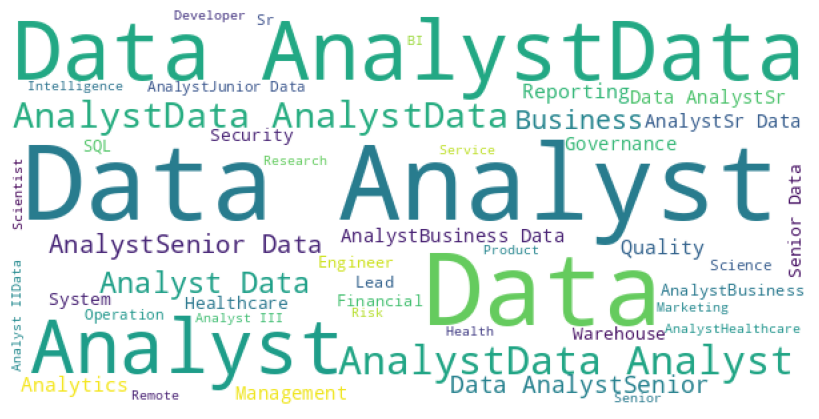

In [ ]:
dfCon = df.copy()
wordcloud = WordCloud(width = 600, height = 300,background_color ='white',min_font_size = 10).generate("".join(df['Job Title'].values.tolist()))
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**Based on this wordcloud, most popular job title is Data Analyst**

**company having Most Job openings**

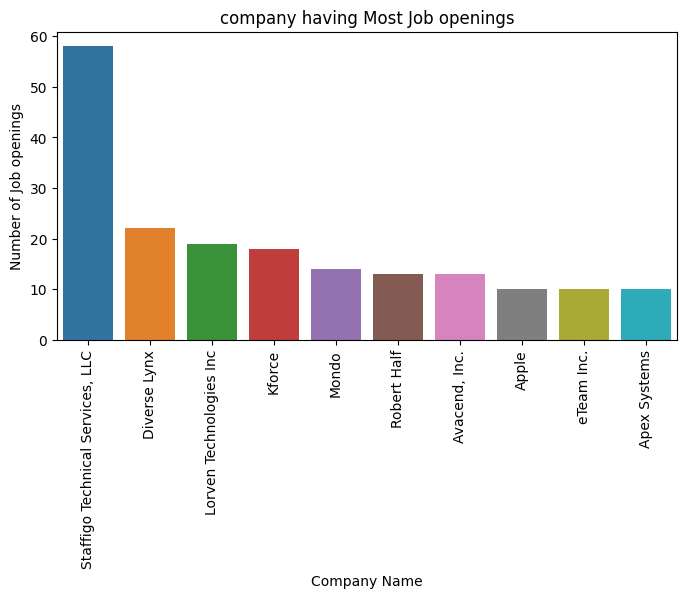

In [ ]:
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])
company = pd.DataFrame(df.groupby('Company Name')['JobID'].nunique().reset_index().sort_values('JobID', ascending=False).iloc[0:10])
plt.figure(figsize=(8,4))
sns.barplot(x='Company Name',y='JobID', data = company)
plt.xlabel("Company Name")
plt.ylabel("Number of Job openings")
plt.title("company having Most Job openings")
plt.xticks(rotation=90)
plt.show()

**Staffigo Technical Services is offering maximum jobs**

**Location wise Jobs distribution**

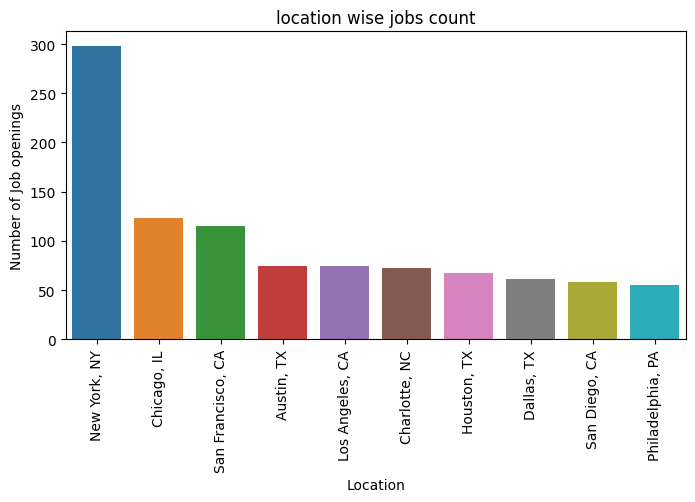

In [ ]:
location = pd.DataFrame(df.groupby('Location')['JobID'].nunique().reset_index().sort_values('JobID', ascending=False).iloc[0:10])
plt.figure(figsize=(8,4))
sns.barplot(x='Location',y='JobID', data = location)
plt.xlabel("Location")
plt.ylabel("Number of Job openings")
plt.title("location wise jobs count")
plt.xticks(rotation=90)
plt.show()

**New York, NY has maximum job posts**

**Company wise job title**

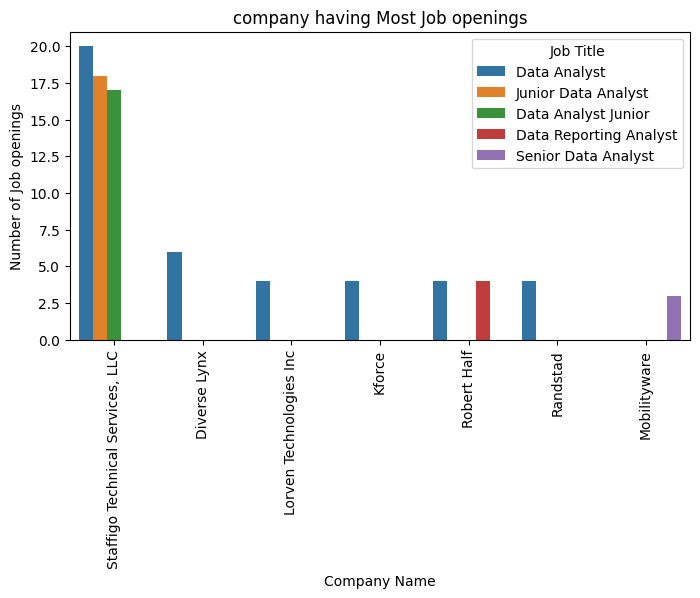

In [ ]:
company = pd.DataFrame(df.groupby(['Company Name', 'Job Title'])['JobID'].nunique().reset_index().sort_values('JobID', ascending=False).iloc[0:10])
plt.figure(figsize=(8,4))
sns.barplot(x='Company Name',y='JobID', data = company, hue='Job Title')
plt.xlabel("Company Name")
plt.ylabel("Number of Job openings")
plt.title("company having Most Job openings")
plt.xticks(rotation=90)
plt.show()